# Week 2 - Homework 1

## Question 1 - Minimizing Steel Mill Costs

SteelCo should manufacture the following monthly:

||Steel 1|Steel 2|Steel 3|
|---|---|---|---|
|Mill 1|400|250|0|
|Mill 2|0|250|300|

This meets their production quota of 400 for Steel 1, 500 for Steel 2, and 300 for Steel 3.

The total cost for this will be $12,000.00.

Runtimes for both Mills will be at 13,500 minutes.

In [4]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# defines the problem
prob = LpProblem("problem", LpMinimize)

# declare your variables
m1s1 = LpVariable("Mill 1 Steel 1", 0, None) # Mill 1 Steel 1
m1s2 = LpVariable("Mill 1 Steel 2", 0, None) # Mill 1 Steel 2
m1s3 = LpVariable("Mill 1 Steel 3", 0, None) # Mill 1 Steel 3
m2s1 = LpVariable("Mill 2 Steel 1", 0, None) # Mill 2 Steel 1
m2s2 = LpVariable("Mill 2 Steel 2", 0, None) # Mill 2 Steel 2
m2s3 = LpVariable("Mill 2 Steel 3", 0, None) # Mill 2 Steel 3

# Objective function
# minimize cost of Steel 1,2,3 from Mills 1,2
prob += 10*m1s1 + 11*m1s2 + 14*m1s3 + 12*m2s1 + 9*m2s2 + 10*m2s3 

# Constraints 
# need at least 400 Steel 1
prob += m1s1 + m2s1 >= 400

# need at least 500 Steel 2
prob += m1s2 + m2s2 >= 500

# need at least 300 Steel 3
prob += m1s3 + m2s3 >= 300

# total amount of steel 2 must be lesser than or equal to Steel 1 + Steel 3
prob += m1s2 + m2s2 <= m1s1 + m2s1 + m1s3 + m2s3

# blast time constraint
# mill 1 run time must be equal to mill 2 run time
prob += 20*m1s1 + 22*m1s2 + 28*m1s3 == 24*m2s1 + 18*m2s2 + 30*m2s3


# solve the problem
status = prob.solve()
LpStatus[status]

# print the results
for variable in prob.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = ${value(prob.objective)}")

#print total run time to check
print(f'total run time for mill 1 {20 * value(m1s1) + 22 * value(m1s2) + 28 * value(m1s3)}')
print(f'total run time for mill 2 {24 * value(m2s1) + 18 * value(m2s2) + 30 * value(m2s3)}')

Mill_1_Steel_1 = 400.0
Mill_1_Steel_2 = 250.0
Mill_1_Steel_3 = 0.0
Mill_2_Steel_1 = 0.0
Mill_2_Steel_2 = 250.0
Mill_2_Steel_3 = 300.0
Objective = $12000.0
total run time for mill 1 13500.0
total run time for mill 2 13500.0


## Question 2 

### Converting to Standard Form

Original

$\text{Max Z} = -4x1 + 2x2$

$ \text{subject to} =   \left\{
\begin{array}{ll}
      -2x_{1} + 2x_{2} \le 7 \\
      x_{1}\ge 2 \\
      x_{1} - 4x_{2} \le 0  \\
      2x_{1} + 2x_{2} \ge 10  \\
      x_{1},x_{2} \ge 0 \\
\end{array} 
\right.  $


We have 4 inequality constraints that are going to need slack variables. We'll call these $s_{1},s_{2},s_{3},s_{4}$

#### Step 1
First up is: $-2x_{1} + 2x_{2} \le 7$. We need to make this $=$ 

We'll add in the slack variables so we get $-2x_{1} + 2x_{2} + s_{1} + 0s_{2} + 0s_{3} + 0s_{4} = 7$

We can clean this up to $-2x_{1} + 2x_{2} + s_{1} = 7$


#### Step 2
*A tricky note here is that we subtract our helper variable because it's a surplus (how much is the left hand side greater than the right hand side)*

Second up is: $x_{1} \ge 2$. We need to make this $=$ 

We'll add in the slack variables so we get $x_{1} + 0s_{1} - s_{2} + 0s_{3} + 0s_{4} = 2$

We can clean this up to $x_{1} - s_{2} = 2$

#### Step 3
Second up is: $x_{1} - 4x_{2} \le 0$. We need to make this $=$ 

We'll add in the slack variables so we get $x_{1} - 4x_{2} + 0s_{1} + 0s_{2} + s_{3} + 0s_{4} = 0$

We can clean this up to $x_{1} - 4x_{2} + s_{3} = 0$

#### Step 4
Third up is: $2x_{1} + 2x_{2} \ge 10$. We need to make this $= $

We'll add in the slack variables so we get $2x_{1} + 2x_{2} + 0s_{1} + 0s_{2} + 0s_{3} - s_{4} = 10$

We can clean this up to $2x_{1} + 2x_{2} - s_{4} = 10$

#### Final Output

$\text{Max Z} = -4x1 + 2x2$

$ \text{subject to} =   \left\{
\begin{array}{ll}
      -2x_{1} + 2x_{2} + s_{1} = 7 \\
      x_{1} - s_{2} = 2 \\
      x_{1} - 4x_{2} + s_{3} = 0 \\
      2x_{1} + 2x_{2} - s_{4} = 10\\
      x_{1},x_{2},s_{1},s_{2},s_{3},s_{4} \ge 0
\end{array} 
\right.  $

### Solving it graphically

We can see the three vertices are (x1 = 2, x2 = 5.5), (x1 = 2, x2 = 3), (x1 = 4, x2 = 1)

The optimal solution to maximize is (x1 = 2, x2 = 5.5) which returns 3 for the maximized function. (x1 = 2, x2 = 3) returns -2 and (x1 = 4, x2 = 1) returns -14

Text(2.5, 5.5, '(x1 = 2, x2 = 5.5) z = 3')

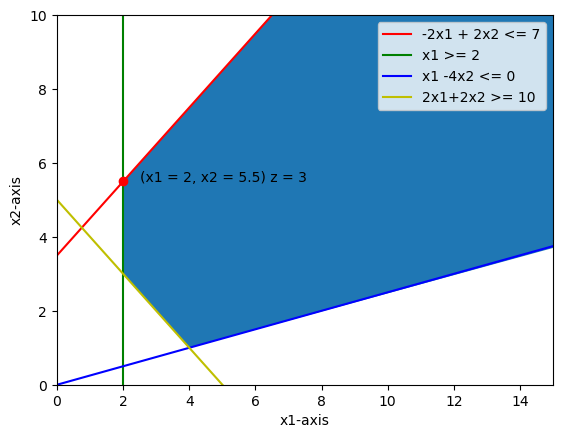

In [39]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# set xrange
x1 = np.linspace(0,15)

#convert everything in terms of x1 as x

c0 = 3.5 + x1
c1 = 2
c2 = .25*x1
c3 = 5 - x1

plt.xlim(0,15)
plt.ylim(0,10)

plt.xlabel('x1-axis')
plt.ylabel('x2-axis')

plt.plot(x1,c0,color='r')
plt.axvline(x=2,color='g')
plt.plot(x1,c2,color='b')
plt.plot(x1,c3,color='y')
plt.legend(['-2x1 + 2x2 <= 7', 'x1 >= 2','x1 -4x2 <= 0', '2x1+2x2 >= 10'])
x= [ 2.0, 2.0, 6.5, 15, 15, 4.0, 2.0]
y= [ 3.0, 5.5, 10.0, 10.0, 3.7, 1, 3.0]
plt.fill_betweenx(y, x, max(x))

plt.plot(2,5.5,'ro')

plt.annotate('(x1 = 2, x2 = 5.5) z = 3',(2,5.5), xytext= (2.5,5.5))

In [31]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# defines the problem
prob = LpProblem("problem", LpMaximize)

# declare your variables
x1 = LpVariable("x1", 0, None) 
x2 = LpVariable("x2", 0, None) 

# Objective function
prob += -4*x1 + 2*x2

# Constraints 
prob += -2*x1 + 2*x2 <= 7
prob += x1 >= 2
prob += x1 - 4*x2 <= 0
prob += 2*x1 + 2*x2 >= 10
prob += x2 >= 0



# solve the problem
status = prob.solve()
LpStatus[status]

# print the results
for variable in prob.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = {value(prob.objective)}")


x1 = 2.0
x2 = 5.5
Objective = 3.0


## Question 3

The optimal investment strategy for finco is the following. 

In month one they have $200 to invest. They should invest in month 1 the entirety of the $200 surplus into a 4 month investment to give the most return on the 5th month

In month two they take the return + the leftover money and split it. 199.8 goes to a 1 month investment to cover the $200 deficit in month 3. 100.2 goes to a 3-month investment to mature at month 5

In month three the invest nothing to since they're at net 0 dollars. 

Then in month four they do the same and invest all of their money into they take the return + the leftover money and invest all $50 into a 1 month investment

This should return $369.26 for the start of month 5 when everything matures.

In [29]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# defines the problem
# maximize investment for return on month 5
prob = LpProblem("problem", LpMaximize)

# declare your variables
# simplified due to month 4 - 4 month investment not being possible to have cash on hand at month 5 since 4+4 > 5
m11 = LpVariable("Month 1 Investment 1 Month", 0, None) 
m12 = LpVariable("Month 1 Investment 2 Months", 0, None) 
m13 = LpVariable("Month 1 Investment 3 Months", 0, None) 
m14 = LpVariable("Month 1 Investment 4 Months", 0, None)
m21 = LpVariable("Month 2 Investment 1 Month", 0, None) 
m22 = LpVariable("Month 2 Investment 2 Months", 0, None) 
m23 = LpVariable("Month 2 Investment 3 Months", 0, None) 
m31 = LpVariable("Month 3 Investment 1 Month", 0, None) 
m32 = LpVariable("Month 3 Investment 2 Months", 0, None) 
m41 = LpVariable("Month 4 Investment 1 Month", 0, None) 



# Objective function
# all possible investment returns - the actual investment + (all rev - all costs)
prob += 1.08*m14 + 1.03*m13 + 1.03*m23 + 1.01*m12 + 1.01*m22 + 1.01*m32 + 1.001*m11 + 1.001*m21 + 1.001*m31 + 1.001*m41 - (m11 + m12 + m13 + m14) - (m21 + m22 + m23) - (m31 + m32) - (m41) +350


# Constraints 
# can invest at most 200 in month 1
prob += m11 + m12 + m13 + m14 == 200 

# can invest at most x in month 2
# month 2 rev - bill = 300 + any return from m1 investment
prob+= 800 + 1.001*m11 - 500 == (m21 + m22 + m23) 

# can invest at most x in month 3
# month 3 rev - bill = -200 + any return from m12/m21 investment
prob+= 300 + 1.01*m12 + 1.001*m21 - (m31+m32) >= 500

# can invest at most x in month 4
# month 4 rev - bill = 50 + any return from m13/m22/m31 investment
prob+= 300 + 1.03*m13 + 1.01*m22 + 1.001*m31 - 250 >= (m41)




# solve the problem
status = prob.solve()
LpStatus[status]

# print the results
for variable in prob.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = ${value(prob.objective)}")



Month_1_Investment_1_Month = 0.0
Month_1_Investment_2_Months = 0.0
Month_1_Investment_3_Months = 0.0
Month_1_Investment_4_Months = 200.0
Month_2_Investment_1_Month = 199.8
Month_2_Investment_2_Months = 0.0
Month_2_Investment_3_Months = 100.2
Month_3_Investment_1_Month = 0.0
Month_3_Investment_2_Months = 0.0
Month_4_Investment_1_Month = 50.0
Objective = $369.2558


## Question 4

In [42]:
35/50

0.7

In [43]:
18/30

0.6

Dark_Meat___Cutlet_1 = 15.0
Dark_Meat___Cutlet_2 = 12.0
Turkey_1 = 8.66667
Turkey_2 = 3.22222
White_Meat___Cutlet_1 = 35.0
White_Meat___Cutlet_2 = 18.0
Objective = $177.55554

TurkeyCo should buy 8.66667 Turkey type 1s and 3.22222 Turkey type 2s. 

We sell a total of 50 pounds of Cutlet 1 and 30 pounts of Cutlet 2 meaning we need a minimum of 80 pounds of meat to blend. 

We have $(8.66667*5) + (3.22222*3) = 53lbs$ total white meat. 

We have $(8.66667*2) + (3.22222*3) = 27lbs$ total dark meat.

For formulating the cutlets Cutlet 1 we maintain a white/dark ratio of .7.

For formulating the cutlets Cutlet 2 we maintain a white/dark ratio of .6. 

The total revenue comes to (50lbs * Cutlet 1) + (30lbs * Cutlet 2) = $290.

The total cost is (9 turkey 1s * $10) + (3 turkey 2s * $8) = $112.44446

Total profit is $290 - $112.44446 = $177.56

In [40]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# defines the problem
prob = LpProblem("problem", LpMaximize)

# declare your variables
c1w = LpVariable("White Meat - Cutlet 1", 0, None)
c1d = LpVariable("Dark Meat - Cutlet 1", 0, None)
c2w = LpVariable("White Meat - Cutlet 2", 0, None)
c2d = LpVariable("Dark Meat - Cutlet 2", 0, None)
#t1 = LpVariable("Turkey 1", 0, cat= 'Integer') #uncomment for integer
#t2 = LpVariable("Turkey 2", 0, cat= 'Integer') #uncomment for integer
t1 = LpVariable("Turkey 1", 0, None) #uncomment for integer
t2 = LpVariable("Turkey 2", 0, None) #uncomment for integer

# Objective function
# maximize profits for the cutlets against cost of turkeys
prob += 4*(c1w + c1d) + 3*(c2w + c2d) - (10*t1 + 8*t2)

# Constraints 
# can only sell 50lbs of Cutlet 1
prob += c1w + c1d <= 50

# can only sell 30lbs of Cutlet 2
prob += c2w + c2d <= 30

# white meat from Turkey 1 + 2 to meet white meat needs
# turkey 1 gives 5 and turkey 2 gives 3
prob += c1w + c2w <= 5*t1 + 3*t2

# dark  meat from Turkey 1 + 2 to meet white meat needs
# turkey 1 gives 2 and turkey 2 gives 3
prob += c1d + c2d <= 2*t1 + 3*t2

# cutlet 1 mix requirements
# white meat >= 70%
prob += c1w >= 0.7*(c1w + c1d)

# cutlet 2 mix requirements
# white meat >= 60%
prob += c2w >= 0.6*(c2w + c2d)


# solve the problem
status = prob.solve()
LpStatus[status]

# print the results
for variable in prob.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = ${value(prob.objective)}")



Dark_Meat___Cutlet_1 = 15.0
Dark_Meat___Cutlet_2 = 12.0
Turkey_1 = 8.66667
Turkey_2 = 3.22222
White_Meat___Cutlet_1 = 35.0
White_Meat___Cutlet_2 = 18.0
Objective = $177.55554


## Question 5

For the company's year long production and storage solution.

In Q1 they should produce 140 units. They'll store 10 units. 

In Q2 they should produce 200 units. They'll store 40 units. 

In Q3 they should produce 200 units and consume the 50 units in storage

In Q4 they should product 150 units. 

This minizes storage and production costs to result in $11,490.00 of spend. 

Q1_Production = 140.0
Q1_Stored = 10.0
Q2_Production = 200.0
Q2_Stored = 50.0
Q3_Production = 200.0
Q3_Stored = 0.0
Q4_Production = 150.0
Q4_Stored = 0.0
Objective = $11490.0

In [46]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# defines the problem
prob = LpProblem("problem", LpMinimize)

# declare your variables
q1p = LpVariable("Q1 Production", 0, None)
q2p = LpVariable("Q2 Production", 0, None)
q3p = LpVariable("Q3 Production", 0, None)
q4p = LpVariable("Q4 Production", 0, None)
q1s = LpVariable("Q1 Stored", 0, None)
q2s = LpVariable("Q2 Stored", 0, None)
q3s = LpVariable("Q3 Stored", 0, None)
q4s = LpVariable("Q4 Stored", 0, None)



# Objective function
# quarterly production + quarterly storage
prob += 15*q1p + 16*q2p + 17*q3p + 18*q4p + 1.5*q1s + 1.5*q2s + 1.5*q3s

# Constraints 
# can only store 60 units total
prob += q1s <= 60
prob += q2s <= 60
prob += q3s <= 60

# storage = production plus storage minus quota
prob += q1s == q1p - 130 
prob += q2s == (q2p + q1s) - 160
prob += q3s == (q3p + q2s) - 250
prob += q4s == (q4p + q3s) - 150


# can only make 200 units per quarter
prob += q1p <= 200
prob += q2p <= 200
prob += q3p <= 200
prob += q4p <= 200




# solve the problem
status = prob.solve()
LpStatus[status]

# print the results
for variable in prob.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = ${value(prob.objective)}")



Q1_Production = 140.0
Q1_Stored = 10.0
Q2_Production = 200.0
Q2_Stored = 50.0
Q3_Production = 200.0
Q3_Stored = 0.0
Q4_Production = 150.0
Q4_Stored = 0.0
Objective = $11490.0
